In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
df = pd.read_csv("training.csv")

In [4]:
df.head()

,image,image class,date,bar,baz,xgt,qgg,lux,wsg,yyz,drt,gox,foo,boz,fyt,lgh,hrt,juu,target
0,training-img/flower/flower_79.jpg,flower,2016-04-05,-13.797746,1,132.244709,-14.888019,7059.592259,0.018760,-10.131641,-3.314482,-19.637941,24.774895,0.077676,1,0,-144.078606,367.977834,134340.064080
1,training-img/boat/boat_10.jpg,boat,2017-12-29,1370.968441,0,-53.010396,-0.249638,5404.074707,0.014199,-0.840672,-57.505186,-0.477005,43.993301,4.266039,1,1,-169.232629,215.094104,167657.624550
2,training-img/airplane/airplane_94.jpg,airplane,2016-06-28,1240.615863,1,318.103170,25.234516,6435.785062,0.014366,-4.984576,-0.222097,-9.078957,2.444880,1.035487,1,1,-220.349351,220.027026,157211.302698
3,training-img/boat/boat_79.jpg,boat,2017-05-31,1258.368516,0,221.068821,-5.604373,4915.487849,0.021967,6.189880,-0.732725,2.324312,19.290565,0.206948,0,0,-246.892243,495.729658,-47320.604867
4,training-img/llama/llama_25.jpg,llama,2018-03-29,307.458019,0,259.110856,2.896887,5285.831301,0.014830,-7.544632,-22.701896,3.066921,11.171308,0.530466,1,0,-199.510487,234.047119,-85209.683794


In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df['year'] = df.date.dt.year

In [7]:
df['month'] = df.date.dt.month

In [8]:
df.drop(columns='date',inplace=True)

In [9]:
df.drop(columns=['image class'],inplace=True)

In [10]:
df.head()

,image,bar,baz,xgt,qgg,lux,wsg,yyz,drt,gox,foo,boz,fyt,lgh,hrt,juu,target,year,month
0,training-img/flower/flower_79.jpg,-13.797746,1,132.244709,-14.888019,7059.592259,0.018760,-10.131641,-3.314482,-19.637941,24.774895,0.077676,1,0,-144.078606,367.977834,134340.064080,2016,4
1,training-img/boat/boat_10.jpg,1370.968441,0,-53.010396,-0.249638,5404.074707,0.014199,-0.840672,-57.505186,-0.477005,43.993301,4.266039,1,1,-169.232629,215.094104,167657.624550,2017,12
2,training-img/airplane/airplane_94.jpg,1240.615863,1,318.103170,25.234516,6435.785062,0.014366,-4.984576,-0.222097,-9.078957,2.444880,1.035487,1,1,-220.349351,220.027026,157211.302698,2016,6
3,training-img/boat/boat_79.jpg,1258.368516,0,221.068821,-5.604373,4915.487849,0.021967,6.189880,-0.732725,2.324312,19.290565,0.206948,0,0,-246.892243,495.729658,-47320.604867,2017,5
4,training-img/llama/llama_25.jpg,307.458019,0,259.110856,2.896887,5285.831301,0.014830,-7.544632,-22.701896,3.066921,11.171308,0.530466,1,0,-199.510487,234.047119,-85209.683794,2018,3


In [11]:
df.shape

(678, 19)

# Imp step

In [12]:
df.drop(columns=['juu'],inplace=True)

### Describe dataframe

In [13]:
df.describe()

,bar,baz,xgt,qgg,lux,wsg,yyz,drt,gox,foo,boz,fyt,lgh,hrt,target,year,month
count,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000
mean,272.596959,0.483776,90.587944,0.275038,5972.968223,0.013516,-0.562406,-1176.249240,0.060121,27.726691,2.933559,0.471976,0.349558,-250.798255,78097.213980,2017.148968,6.533923
std,455.674351,0.500106,199.787516,10.632054,946.157717,0.004958,10.238688,11114.814451,10.212959,12.733780,7.772302,0.499583,0.477182,169.232001,140731.435987,0.896369,3.391866
min,-122.718563,0.000000,-659.009264,-26.393565,3577.806382,-0.001431,-26.589758,-263127.335321,-26.977454,-5.853642,0.023978,0.000000,0.000000,-735.738392,-242403.223513,2016.000000,1.000000
25%,-1.172115,0.000000,-41.027457,-5.145561,5251.671467,0.010015,-6.000219,-177.561933,-5.402552,19.073640,0.323719,0.000000,0.000000,-369.058274,-52162.134730,2016.000000,4.000000
50%,29.902258,0.000000,88.263655,0.256704,5913.579658,0.013589,-0.285696,-21.629014,0.201862,27.239246,0.951086,0.000000,0.000000,-253.188698,92688.358555,2017.000000,6.500000
75%,394.663978,1.000000,230.012526,5.338567,6713.397840,0.017047,4.805834,-3.325435,5.296834,36.446692,2.476563,1.000000,1.000000,-137.419007,180006.879472,2018.000000,9.000000
max,1719.200416,1.000000,756.848769,25.452515,7627.667867,0.029869,25.742596,-0.001729,26.936961,66.001361,103.649905,1.000000,1.000000,266.571596,485804.881893,2019.000000,12.000000


From the above plot of 'wsg' on x-axis and 'target' on y-axis, looking at the extreme right and  left points, I can say that, the outliers (> 0.27 and < 0.00) can be removed without disturbing the regression

### Removing outliers in all the features

In [14]:
quantiles = df.quantile([0.01, 0.99])

In [15]:
quantiles

,bar,baz,xgt,qgg,lux,wsg,yyz,drt,gox,foo,boz,fyt,lgh,hrt,target,year,month
0.01,-105.432227,0.0,-371.923537,-23.061898,3897.074830,0.002584,-23.028386,-21759.595004,-22.968792,-0.567900,0.040903,0.0,0.0,-651.162756,-172601.209322,2016.0,1.0
0.99,1663.607414,1.0,546.505652,23.477664,7587.693393,0.025830,23.038555,-0.027267,24.687106,55.994209,38.485264,1.0,1.0,161.486255,357561.437930,2019.0,12.0


In [ ]:
quantiles.index

In [ ]:
df.shape

In [22]:
cols = df.drop(columns=['image','target']).columns

In [23]:
cols

Index(['bar', 'baz', 'xgt', 'qgg', 'lux', 'wsg', 'yyz', 'drt', 'gox', 'foo',
       'boz', 'fyt', 'lgh', 'hrt', 'year', 'month'],
      dtype='object')

In [24]:
df2 = df.copy(deep=True)

In [25]:
df2.head()

,image,bar,baz,xgt,qgg,lux,wsg,yyz,drt,gox,foo,boz,fyt,lgh,hrt,target,year,month
0,training-img/flower/flower_79.jpg,-13.797746,1,132.244709,-14.888019,7059.592259,0.018760,-10.131641,-3.314482,-19.637941,24.774895,0.077676,1,0,-144.078606,134340.064080,2016,4
1,training-img/boat/boat_10.jpg,1370.968441,0,-53.010396,-0.249638,5404.074707,0.014199,-0.840672,-57.505186,-0.477005,43.993301,4.266039,1,1,-169.232629,167657.624550,2017,12
2,training-img/airplane/airplane_94.jpg,1240.615863,1,318.103170,25.234516,6435.785062,0.014366,-4.984576,-0.222097,-9.078957,2.444880,1.035487,1,1,-220.349351,157211.302698,2016,6
3,training-img/boat/boat_79.jpg,1258.368516,0,221.068821,-5.604373,4915.487849,0.021967,6.189880,-0.732725,2.324312,19.290565,0.206948,0,0,-246.892243,-47320.604867,2017,5
4,training-img/llama/llama_25.jpg,307.458019,0,259.110856,2.896887,5285.831301,0.014830,-7.544632,-22.701896,3.066921,11.171308,0.530466,1,0,-199.510487,-85209.683794,2018,3


In [26]:
for col in cols:
    print(col)
    idx = df2[df2[col]>quantiles[col][0.99]].index
    print(idx)
    df2.drop(idx , inplace=True)
    print(df2)

bar
Int64Index([19, 268, 314, 349, 423, 533, 561], dtype='int64')
                                     image          bar  baz         xgt  \
0        training-img/flower/flower_79.jpg   -13.797746    1  132.244709   
1            training-img/boat/boat_10.jpg  1370.968441    0  -53.010396   
2    training-img/airplane/airplane_94.jpg  1240.615863    1  318.103170   
3            training-img/boat/boat_79.jpg  1258.368516    0  221.068821   
4          training-img/llama/llama_25.jpg   307.458019    0  259.110856   
5            training-img/cake/cake_33.jpg   451.983142    0  174.338815   
6    training-img/mountain/mountain_85.jpg   486.472807    1   14.124790   
7            training-img/boat/boat_89.jpg   331.774076    1  149.158280   
8      training-img/cartoon/cartoon_18.jpg   226.960903    0   81.079297   
9            training-img/boat/boat_94.jpg   274.333520    1  118.108062   
10           training-img/cake/cake_82.jpg   233.862419    0  149.839283   
11             trainin

                                     image          bar  baz         xgt  \
0        training-img/flower/flower_79.jpg   -13.797746    1  132.244709   
1            training-img/boat/boat_10.jpg  1370.968441    0  -53.010396   
3            training-img/boat/boat_79.jpg  1258.368516    0  221.068821   
4          training-img/llama/llama_25.jpg   307.458019    0  259.110856   
5            training-img/cake/cake_33.jpg   451.983142    0  174.338815   
6    training-img/mountain/mountain_85.jpg   486.472807    1   14.124790   
7            training-img/boat/boat_89.jpg   331.774076    1  149.158280   
8      training-img/cartoon/cartoon_18.jpg   226.960903    0   81.079297   
9            training-img/boat/boat_94.jpg   274.333520    1  118.108062   
10           training-img/cake/cake_82.jpg   233.862419    0  149.839283   
11             training-img/dog/dog_51.jpg    -6.806921    1 -276.080534   
12            training-img/cake/cake_4.jpg   247.277638    1  459.853572   
13   trainin

In [27]:
df2.shape

(605, 18)

In [28]:
df.shape

(678, 18)

In [29]:
df2.head()

,image,bar,baz,xgt,qgg,lux,wsg,yyz,drt,gox,foo,boz,fyt,lgh,hrt,target,year,month
0,training-img/flower/flower_79.jpg,-13.797746,1,132.244709,-14.888019,7059.592259,0.018760,-10.131641,-3.314482,-19.637941,24.774895,0.077676,1,0,-144.078606,134340.064080,2016,4
1,training-img/boat/boat_10.jpg,1370.968441,0,-53.010396,-0.249638,5404.074707,0.014199,-0.840672,-57.505186,-0.477005,43.993301,4.266039,1,1,-169.232629,167657.624550,2017,12
3,training-img/boat/boat_79.jpg,1258.368516,0,221.068821,-5.604373,4915.487849,0.021967,6.189880,-0.732725,2.324312,19.290565,0.206948,0,0,-246.892243,-47320.604867,2017,5
4,training-img/llama/llama_25.jpg,307.458019,0,259.110856,2.896887,5285.831301,0.014830,-7.544632,-22.701896,3.066921,11.171308,0.530466,1,0,-199.510487,-85209.683794,2018,3
5,training-img/cake/cake_33.jpg,451.983142,0,174.338815,10.095626,6640.632763,0.004286,18.094218,-606.445127,17.733978,25.465547,0.185603,0,0,-378.051879,126100.528933,2016,3


In [30]:
df2.reset_index(inplace=True)

In [31]:
df2.shape

(605, 19)

In [32]:
df2.head(2)

,index,image,bar,baz,xgt,qgg,lux,wsg,yyz,drt,gox,foo,boz,fyt,lgh,hrt,target,year,month
0,0,training-img/flower/flower_79.jpg,-13.797746,1,132.244709,-14.888019,7059.592259,0.018760,-10.131641,-3.314482,-19.637941,24.774895,0.077676,1,0,-144.078606,134340.06408,2016,4
1,1,training-img/boat/boat_10.jpg,1370.968441,0,-53.010396,-0.249638,5404.074707,0.014199,-0.840672,-57.505186,-0.477005,43.993301,4.266039,1,1,-169.232629,167657.62455,2017,12


73 records are deleted coz of being outliers

In [33]:
df2.drop(columns='index',inplace=True)

In [34]:
df2.shape

(605, 18)

In [35]:
df2.columns

Index(['image', 'bar', 'baz', 'xgt', 'qgg', 'lux', 'wsg', 'yyz', 'drt', 'gox',
       'foo', 'boz', 'fyt', 'lgh', 'hrt', 'target', 'year', 'month'],
      dtype='object')

In [36]:
df4 = df2.drop(columns=[
   'baz','fyt','lgh', 'hrt','drt','foo','bar','lux','wsg','boz'
])

In [37]:
df4.head()

,image,xgt,qgg,yyz,gox,target,year,month
0,training-img/flower/flower_79.jpg,132.244709,-14.888019,-10.131641,-19.637941,134340.064080,2016,4
1,training-img/boat/boat_10.jpg,-53.010396,-0.249638,-0.840672,-0.477005,167657.624550,2017,12
2,training-img/boat/boat_79.jpg,221.068821,-5.604373,6.189880,2.324312,-47320.604867,2017,5
3,training-img/llama/llama_25.jpg,259.110856,2.896887,-7.544632,3.066921,-85209.683794,2018,3
4,training-img/cake/cake_33.jpg,174.338815,10.095626,18.094218,17.733978,126100.528933,2016,3


## 3rd round with important features

### Train - test splitting

In [38]:
X, y = df4.drop(columns='target'), df4.target

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [41]:
X_train.shape

(405, 7)

In [42]:
X_train

,image,xgt,qgg,yyz,gox,year,month
149,training-img/flower/flower_26.jpg,-81.434284,-0.728481,0.431056,-0.514309,2016,5
124,training-img/person/person_61.jpg,300.478361,-0.561939,-0.449844,-0.691751,2018,1
432,training-img/cat/cat_42.jpg,357.521204,6.876097,-3.571723,-3.454917,2016,12
470,training-img/mountain/mountain_13.jpg,2.760244,-0.234794,0.841740,-0.490901,2018,12
185,training-img/boat/boat_27.jpg,188.231993,11.614794,-15.546110,19.489664,2017,3
228,training-img/cartoon/cartoon_10.jpg,-181.086959,0.967076,-0.115809,0.146632,2016,12
518,training-img/airplane/airplane_20.jpg,115.144289,4.116421,5.441400,5.030954,2016,4
248,training-img/flower/flower_81.jpg,199.133052,3.766345,-6.100407,4.199935,2018,8
264,training-img/cake/cake_20.jpg,75.965116,-19.585510,-10.312076,-16.352644,2019,2
250,training-img/mountain/mountain_88.jpg,182.395297,-13.638851,-16.462363,-16.993339,2018,12


In [43]:
X_test.shape

(200, 7)

In [44]:
X_test

,image,xgt,qgg,yyz,gox,year,month
412,training-img/cartoon/cartoon_44.jpg,299.989206,-0.301337,0.828268,-0.472648,2018,3
289,training-img/cake/cake_58.jpg,-148.655347,-23.003767,-10.374666,10.688689,2016,12
76,training-img/flower/flower_11.jpg,270.992286,0.460531,-0.851534,-0.243588,2017,6
78,training-img/airplane/airplane_95.jpg,184.256761,-0.657603,-0.254668,0.713593,2016,3
182,training-img/cake/cake_48.jpg,49.551087,-0.700738,0.136233,-0.703813,2018,3
594,training-img/boat/boat_4.jpg,-33.248017,0.686552,0.535405,-0.479925,2017,12
10,training-img/dog/dog_51.jpg,-276.080534,-7.683995,-2.629315,2.448664,2018,1
131,training-img/dog/dog_88.jpg,232.612290,3.877867,3.541091,6.496578,2019,2
443,training-img/mountain/mountain_8.jpg,109.614766,-19.717368,-2.872029,18.717169,2016,5
86,training-img/cake/cake_24.jpg,-240.386794,20.064583,11.631269,13.956979,2016,8


In [45]:
y_train.shape

(405,)

In [46]:
y_train

149    276274.431474
124    218504.353969
432   -140723.354537
470    152763.778553
185     94440.459267
228    249683.134880
518    -68339.324494
248    -69953.198866
264     54900.242203
250     26059.468458
587    129177.782740
369    -73177.811626
556    213780.058900
581    232292.731802
114     46082.537694
203    141678.603245
141    225455.844008
340    141965.795276
7      139155.760143
525     43125.083442
19     104437.420920
172    101008.512859
456    -35564.021890
56      96458.595720
302     92883.889347
338    -54438.436656
538   -104630.148354
370    148491.643647
312     55469.392649
49     -86167.624567
           ...      
58     181504.802819
474    183767.655778
560    226577.319278
252    177084.104441
21     293962.595456
313   -129344.393994
459   -172490.717497
160     94580.039299
276     80481.373807
191    178532.858666
385   -123978.348792
413    128602.454334
491    293899.124976
343    -90392.405251
308     93655.212911
130    280478.216326
99      70813

In [47]:
y_test.shape

(200,)

In [48]:
y_test

412    290290.625384
289     56124.023081
76     308844.586314
78     284488.750243
182    246807.511555
594    184737.130078
10    -144680.781345
131   -114359.646828
443    121625.347944
86     132188.793285
70     -27494.918892
493   -139883.426221
514     35991.229643
210    -83083.033077
55     150116.863509
402     12285.669048
30     148624.830731
280    -65149.745141
109    -15528.677981
593    302040.786704
2      -47320.604867
184    105594.923513
600   -139724.671391
204   -144614.185431
192    120151.400666
137    284390.337517
319    -58719.984828
260    181398.057086
577    186505.801680
441    -54988.756639
           ...      
363    249469.614157
341    -71468.731218
561    128957.883542
559     34559.744996
404     28492.687132
167    173192.540011
54     -78560.190287
433     70464.056206
46      31806.491537
93     157683.075602
265    -79241.890373
108    -82771.385711
563    282832.034583
604     57460.465719
570   -108354.918756
444    -63080.572413
304   -142460

In [49]:
df4.head()

,image,xgt,qgg,yyz,gox,target,year,month
0,training-img/flower/flower_79.jpg,132.244709,-14.888019,-10.131641,-19.637941,134340.064080,2016,4
1,training-img/boat/boat_10.jpg,-53.010396,-0.249638,-0.840672,-0.477005,167657.624550,2017,12
2,training-img/boat/boat_79.jpg,221.068821,-5.604373,6.189880,2.324312,-47320.604867,2017,5
3,training-img/llama/llama_25.jpg,259.110856,2.896887,-7.544632,3.066921,-85209.683794,2018,3
4,training-img/cake/cake_33.jpg,174.338815,10.095626,18.094218,17.733978,126100.528933,2016,3


# Adding CNN

In [50]:
import os

In [51]:
from PIL import Image

In [54]:
from keras.models import Sequential
from scipy.misc import imread
get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.layers import Dense
import pandas as pd

from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
from keras.applications.vgg16 import decode_predictions

# train_path="R/Data/Train/Images/train/"
# test_path="R/Data/Train/Images/test/"

In [55]:
# loading VGG16 model weights
model = VGG16(weights='imagenet', include_top=False)


In [56]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [57]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt; 
 
# Importing sklearn libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
 
# Importing hypopt library for grid search
from hypopt import GridSearch
 
# Importing Keras libraries
from keras.utils import np_utils
from keras.models import Sequential
from keras.applications import VGG16
from keras.applications import imagenet_utils
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, GlobalAveragePooling2D

/usr/local/lib/python3.7/site-packages/hypopt/model_selection.py:34: UserWarning: If you want to see estimated completion times
    while running methods in cleanlab.pruning, install tqdm
    via "pip install tqdm".
  warnings.warn(w)


In [60]:
dataPath = "/Users/Adhira/Downloads/DataScienceTest/"

In [63]:
minW, minH = 157,157

In [67]:
def create_features(dataset, pre_model):
    x_scratch = []
    for a in dataset.image:
        img = Image.open(dataPath+a)
        # load the input image and image is resized to 224x224 pixels
        forResize = img.resize((minW,minH),Image.ANTIALIAS)
        forResize = forResize.convert('RGB')
        forResize.save(dataPath+a)
        image = load_img(dataPath+a, target_size=(minW, minH))
        image = img_to_array(image)
        image = np.expand_dims(image, axis=0)
        image = imagenet_utils.preprocess_input(image)
        x_scratch.append(image)
    x = np.vstack(x_scratch)
    features = pre_model.predict(x, batch_size=32)
    print("features",features)
    print("features shape", features.shape)
    features_flatten = features.reshape((features.shape[0], 4 * 4 * 512))
    return x, features, features_flatten

In [68]:
train_x, train_features, train_flattened = create_features(X_train, model)

features [[[[ 0.          0.          0.         ...  0.          7.356075
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]]

  [[ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  6.7093477   0.
     0.        ]]

  [[ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
     0.        ]]

  [[ 0.          0.          0.         ...  0.        

In [69]:
test_x, test_features, test_flattened = create_features(X_test, model)

features [[[[ 0.          0.          0.         ...  0.         21.070702
     0.        ]
   [ 0.          0.          0.         ...  0.         15.206409
     0.        ]
   [ 0.          0.          0.         ...  0.         20.604816
     0.        ]
   [ 0.          0.          0.         ...  0.          0.
    38.356552  ]]

  [[ 0.          0.          0.         ... 20.727272    0.
    35.457542  ]
   [ 0.          0.10878986  0.         ...  0.          5.402847
    67.20907   ]
   [ 0.          0.          0.         ...  0.         46.47838
    60.84671   ]
   [ 0.          0.          0.         ...  0.         24.928232
    46.933125  ]]

  [[ 0.         10.052521    0.         ...  7.46191     7.2679086
    20.033426  ]
   [ 0.         90.18708     0.         ... 10.536359    0.
    65.73968   ]
   [ 0.          0.          0.         ...  4.7373567  26.07165
    46.165234  ]
   [ 0.          0.          0.         ...  1.4967679  22.751669
    10.898777  ]]

  [[ 0. 

In [81]:
train_flattened.shape

(405, 8192)

In [82]:
test_flattened.shape

(200, 8192)

### Feature scaling

In [70]:
from sklearn.preprocessing import MinMaxScaler

In [71]:
scaler = MinMaxScaler()

In [72]:
X_train_minmax = scaler.fit_transform(X_train.drop(columns='image'))


In [73]:
X_test_minmax = scaler.transform(X_test.drop(columns='image'))

In [74]:
X_test_minmax

array([[0.79638873, 0.51801177, 0.55293975, 0.51356601, 0.66666667,
        0.18181818],
       [0.42381726, 0.05450083, 0.32701001, 0.72983183, 0.        ,
        1.        ],
       [0.77230858, 0.53356667, 0.51906316, 0.51800436, 0.33333333,
        0.45454545],
       ...,
       [0.5249143 , 0.93217248, 0.77069168, 0.24443996, 0.33333333,
        0.18181818],
       [0.81287163, 0.78507767, 0.31513718, 0.12049431, 0.66666667,
        0.45454545],
       [0.55580571, 0.51658626, 0.54694146, 0.50784046, 0.33333333,
        0.45454545]])

In [75]:
X_train_minmax.shape

(405, 6)

In [76]:
y_train.shape

(405,)

In [77]:
X_test_minmax.shape

(200, 6)

## Numpy.hstack all features

In [78]:
newTrain = np.hstack((X_train_minmax, train_flattened))

In [79]:
newTrain

array([[ 0.47964018,  0.50929086,  0.54492918, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.79679494,  0.51269111,  0.52716405, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.84416548,  0.66455199,  0.46420506, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.2811192 ,  0.15394822,  0.22491385, ...,  0.        ,
         8.35612774, 12.2847023 ],
       [ 0.7174228 ,  0.39252386,  0.50414647, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.83707674,  0.16958145,  0.18390221, ...,  0.        ,
         0.        ,  0.        ]])

In [80]:
newTrain.shape

(405, 8198)

In [83]:
8192 + 6

8198

In [84]:
newTest = np.hstack((X_test_minmax,test_flattened))

In [85]:
newTest.shape

(200, 8198)

### 1. Simple linear regression model - baseline

In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
reg = LinearRegression().fit(newTrain, y_train)

In [88]:
regPred = reg.predict(newTest)

In [89]:
from sklearn.metrics import mean_squared_error, r2_score

In [90]:
from math import sqrt

regRMSE = sqrt(mean_squared_error(y_test, regPred))

In [91]:
regRMSE

167438.0390294911

#### 167,438 RMSE for linear regression baseline model - IMPORTANT FEATURES

### 3. Random forest

In [92]:
from sklearn.ensemble import RandomForestRegressor

#### Max depth 5 (sqrt of 25 no. of features)

In [93]:
regrRandomIMP = RandomForestRegressor(max_depth=50, random_state=0,
...                              n_estimators=200)
regrRandomIMP.fit(newTrain,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [94]:
forestPredIMP = regrRandomIMP.predict(newTest)

In [95]:
forestRMSEIMP = sqrt(mean_squared_error(y_test, forestPredIMP))
forestRMSEIMP

49097.156777638906

### 49,097

# Grid search

In [96]:
sqrt(8198)

90.54280755532159

# Feature importance

In [97]:
importances = regrRandomIMP.feature_importances_

Feature ranking:
1. feature 2 (0.333554)
2. feature 3 (0.259186)
3. feature 1 (0.241664)
4. feature 5 (0.037674)
5. feature 0 (0.007796)
6. feature 2165 (0.003422)
7. feature 1893 (0.002605)
8. feature 4284 (0.001514)
9. feature 6084 (0.000996)
10. feature 3894 (0.000826)
11. feature 4112 (0.000811)
12. feature 1534 (0.000787)
13. feature 1624 (0.000772)
14. feature 2694 (0.000740)
15. feature 3781 (0.000736)
16. feature 4 (0.000694)
17. feature 4975 (0.000671)
18. feature 7422 (0.000641)
19. feature 2312 (0.000637)
20. feature 2028 (0.000615)
21. feature 4533 (0.000568)
22. feature 4375 (0.000552)
23. feature 7102 (0.000536)
24. feature 6312 (0.000529)
25. feature 492 (0.000516)
26. feature 4141 (0.000492)
27. feature 4734 (0.000489)
28. feature 5320 (0.000488)
29. feature 7951 (0.000484)
30. feature 3709 (0.000472)
31. feature 4691 (0.000469)
32. feature 4624 (0.000467)
33. feature 3862 (0.000459)
34. feature 5385 (0.000440)
35. feature 3425 (0.000418)
36. feature 2453 (0.000416)
37.

1597. feature 2605 (0.000010)
1598. feature 1550 (0.000010)
1599. feature 4644 (0.000010)
1600. feature 7698 (0.000010)
1601. feature 7078 (0.000010)
1602. feature 1885 (0.000010)
1603. feature 5910 (0.000010)
1604. feature 1106 (0.000010)
1605. feature 5167 (0.000010)
1606. feature 2632 (0.000010)
1607. feature 647 (0.000010)
1608. feature 2203 (0.000010)
1609. feature 1014 (0.000010)
1610. feature 6826 (0.000010)
1611. feature 1659 (0.000010)
1612. feature 1366 (0.000010)
1613. feature 1044 (0.000010)
1614. feature 710 (0.000010)
1615. feature 1328 (0.000010)
1616. feature 5653 (0.000010)
1617. feature 2684 (0.000010)
1618. feature 5170 (0.000010)
1619. feature 6721 (0.000010)
1620. feature 4369 (0.000010)
1621. feature 5017 (0.000010)
1622. feature 6165 (0.000010)
1623. feature 1952 (0.000010)
1624. feature 4630 (0.000010)
1625. feature 6118 (0.000010)
1626. feature 4226 (0.000010)
1627. feature 8005 (0.000010)
1628. feature 2949 (0.000010)
1629. feature 4096 (0.000010)
1630. featur

3388. feature 2931 (0.000001)
3389. feature 2801 (0.000001)
3390. feature 4250 (0.000001)
3391. feature 4928 (0.000001)
3392. feature 7630 (0.000001)
3393. feature 4686 (0.000001)
3394. feature 2451 (0.000001)
3395. feature 5140 (0.000001)
3396. feature 2838 (0.000001)
3397. feature 5951 (0.000001)
3398. feature 7610 (0.000001)
3399. feature 7427 (0.000001)
3400. feature 7725 (0.000001)
3401. feature 6011 (0.000001)
3402. feature 1380 (0.000001)
3403. feature 6232 (0.000001)
3404. feature 7033 (0.000001)
3405. feature 5805 (0.000001)
3406. feature 4838 (0.000001)
3407. feature 2271 (0.000001)
3408. feature 7492 (0.000001)
3409. feature 5532 (0.000001)
3410. feature 2152 (0.000001)
3411. feature 1421 (0.000001)
3412. feature 7260 (0.000001)
3413. feature 3941 (0.000001)
3414. feature 6810 (0.000001)
3415. feature 5916 (0.000001)
3416. feature 134 (0.000001)
3417. feature 5584 (0.000001)
3418. feature 3338 (0.000001)
3419. feature 3547 (0.000001)
3420. feature 1600 (0.000001)
3421. featu

4942. feature 4310 (0.000000)
4943. feature 7308 (0.000000)
4944. feature 3083 (0.000000)
4945. feature 1388 (0.000000)
4946. feature 8196 (0.000000)
4947. feature 1617 (0.000000)
4948. feature 2215 (0.000000)
4949. feature 7392 (0.000000)
4950. feature 7645 (0.000000)
4951. feature 4824 (0.000000)
4952. feature 6875 (0.000000)
4953. feature 528 (0.000000)
4954. feature 6359 (0.000000)
4955. feature 4575 (0.000000)
4956. feature 392 (0.000000)
4957. feature 5698 (0.000000)
4958. feature 2145 (0.000000)
4959. feature 2664 (0.000000)
4960. feature 297 (0.000000)
4961. feature 1006 (0.000000)
4962. feature 7475 (0.000000)
4963. feature 81 (0.000000)
4964. feature 1477 (0.000000)
4965. feature 691 (0.000000)
4966. feature 822 (0.000000)
4967. feature 4447 (0.000000)
4968. feature 221 (0.000000)
4969. feature 720 (0.000000)
4970. feature 7846 (0.000000)
4971. feature 4810 (0.000000)
4972. feature 2346 (0.000000)
4973. feature 2492 (0.000000)
4974. feature 513 (0.000000)
4975. feature 2981 (

6226. feature 824 (0.000000)
6227. feature 2163 (0.000000)
6228. feature 1039 (0.000000)
6229. feature 4700 (0.000000)
6230. feature 4457 (0.000000)
6231. feature 5094 (0.000000)
6232. feature 157 (0.000000)
6233. feature 4145 (0.000000)
6234. feature 5459 (0.000000)
6235. feature 4496 (0.000000)
6236. feature 1737 (0.000000)
6237. feature 537 (0.000000)
6238. feature 3898 (0.000000)
6239. feature 6473 (0.000000)
6240. feature 6229 (0.000000)
6241. feature 6302 (0.000000)
6242. feature 6107 (0.000000)
6243. feature 5659 (0.000000)
6244. feature 6102 (0.000000)
6245. feature 2190 (0.000000)
6246. feature 7650 (0.000000)
6247. feature 6366 (0.000000)
6248. feature 2234 (0.000000)
6249. feature 6217 (0.000000)
6250. feature 7091 (0.000000)
6251. feature 5396 (0.000000)
6252. feature 6920 (0.000000)
6253. feature 4106 (0.000000)
6254. feature 4521 (0.000000)
6255. feature 2117 (0.000000)
6256. feature 2448 (0.000000)
6257. feature 1104 (0.000000)
6258. feature 5542 (0.000000)
6259. feature

7398. feature 5783 (0.000000)
7399. feature 3093 (0.000000)
7400. feature 6815 (0.000000)
7401. feature 3030 (0.000000)
7402. feature 229 (0.000000)
7403. feature 2070 (0.000000)
7404. feature 3882 (0.000000)
7405. feature 2366 (0.000000)
7406. feature 7999 (0.000000)
7407. feature 7627 (0.000000)
7408. feature 4427 (0.000000)
7409. feature 976 (0.000000)
7410. feature 1501 (0.000000)
7411. feature 6131 (0.000000)
7412. feature 2997 (0.000000)
7413. feature 6609 (0.000000)
7414. feature 4105 (0.000000)
7415. feature 2853 (0.000000)
7416. feature 7557 (0.000000)
7417. feature 4060 (0.000000)
7418. feature 853 (0.000000)
7419. feature 4696 (0.000000)
7420. feature 3759 (0.000000)
7421. feature 4497 (0.000000)
7422. feature 851 (0.000000)
7423. feature 4910 (0.000000)
7424. feature 1118 (0.000000)
7425. feature 1547 (0.000000)
7426. feature 1144 (0.000000)
7427. feature 2030 (0.000000)
7428. feature 880 (0.000000)
7429. feature 2511 (0.000000)
7430. feature 361 (0.000000)
7431. feature 10

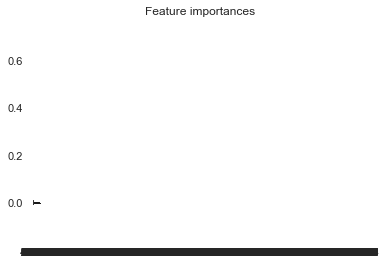

In [98]:
std = np.std([tree.feature_importances_ for tree in regrRandomIMP.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(newTrain.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(newTrain.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(newTrain.shape[1]), indices)
plt.xlim([-1, newTrain.shape[1]])
plt.show()

Image features are not really helpful in this!

In [99]:
cols

Index(['bar', 'baz', 'xgt', 'qgg', 'lux', 'wsg', 'yyz', 'drt', 'gox', 'foo',
       'boz', 'fyt', 'lgh', 'hrt', 'year', 'month'],
      dtype='object')

In [100]:
cols[0]

'bar'

In [101]:
len(cols)

16

In [102]:
len(indices)

8198

In [106]:
best_params = {'n_estimators': 700,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 99,
 'bootstrap': True}

In [113]:
best_random = RandomForestRegressor(
n_estimators=700,
 min_samples_split= 2,
 min_samples_leaf=1,
 max_features= 'auto',
 max_depth= 99,
 bootstrap= True
)
best_random.fit(newTrain,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=99,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=700,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [114]:
bestPred = best_random.predict(newTest)

In [115]:
bestRMSE = sqrt(mean_squared_error(y_test, bestPred))
bestRMSE

47842.15710123871

#### Best RMSE = 37751 without image features
#### Best RMSE = 47,842 with image features

### I choose to ignore image features and build the model to predict test.csv 

# Testing on test.csv

In [116]:
testData = pd.read_csv("test.csv")

In [117]:
testData.head()

,image,date,bar,baz,xgt,qgg,lux,wsg,yyz,drt,gox,foo,boz,fyt,lgh,hrt,juu
0,test-img/boat/boat_3.jpg,2020-11-18,495.361007,0,331.966668,21.021535,5190.710171,0.015209,-12.344110,-4.587213,-11.226993,-7.996372,5.512998,1,0,-239.178795,245.806207
1,test-img/person/person_53.jpg,2019-01-20,127.415879,1,396.851851,5.630238,4767.268227,0.010817,5.499534,-25.675941,3.239795,23.326502,3.817169,0,1,-192.272913,126.256960
2,test-img/boat/boat_62.jpg,2019-07-05,-48.353010,0,414.096801,-0.406343,4452.181336,0.010609,-0.746068,-15.213459,-0.518122,38.568789,3.019702,0,0,-113.590865,121.513203
3,test-img/car/car_7.jpg,2020-12-15,53.163824,0,365.537458,15.611367,5864.571557,0.013082,-17.029956,-38.933399,14.905780,43.321533,0.935854,1,0,-27.423755,183.329267
4,test-img/cat/cat_2.jpg,2020-03-20,-32.591336,0,263.053669,-5.938351,4983.384140,0.015802,-7.017901,-7.066405,-25.428807,37.850267,0.213952,1,1,-192.477269,264.677689


In [ ]:
testData.drop(columns=['image','date',
    'baz','fyt','lgh', 'hrt','drt','juu','foo','bar','lux'
],inplace=True)

In [ ]:
testData.head()

### Feature scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
testX_minmax = scaler.fit_transform(testData)


In [ ]:
df4.shape

In [ ]:
df4.head()

In [ ]:
testX_minmax.shape